In [153]:
import math
from math import pi
import numpy as np
import random
import matplotlib.pyplot as plt 
 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,Perceptron
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

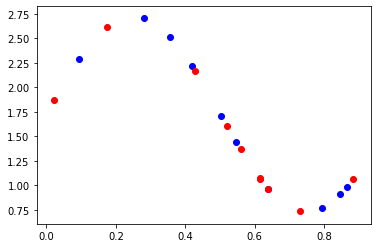

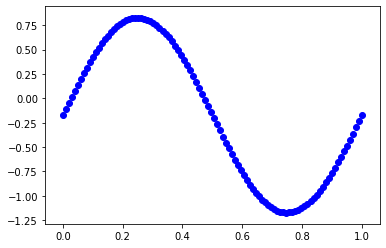

In [203]:
#generate 10 data
X = []
Y = []

for i in range(0, 20):
    x = random.uniform(0, 1)
    X.append(x)

X = np.array(X).reshape(-1,1)
Y = np.array(np.sin(2*pi*X) + np.random.normal(size=1))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

plt.scatter(X_train, Y_train, c = 'b')
plt.scatter(X_test, Y_test, c = 'r')
plt.show()

#generate 100 data

X_100 = np.linspace(0,1,100)     

X_100 = np.array(X_100).reshape(-1,1)

Y_100 = np.array(np.sin(2*pi*X_100) + np.random.normal(size=1))

plt.scatter(X_100, Y_100, c = 'b')
plt.show()

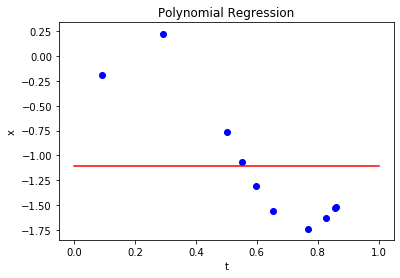

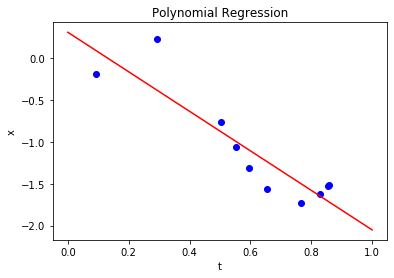

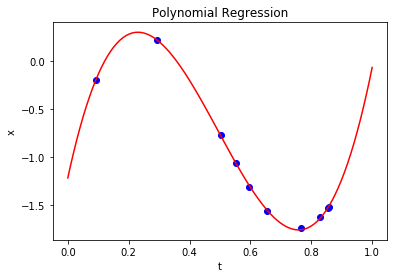

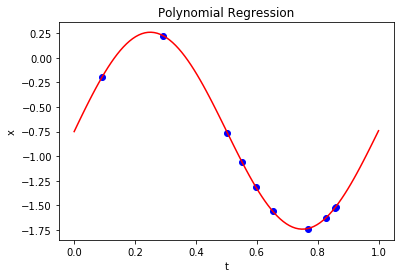

In [189]:
#10 data
x = np.linspace(0, 1, 100)
degree = [0, 1, 3, 9]
for deg in degree:
    poly = PolynomialFeatures(degree=deg)
    x_train_poly = poly.fit_transform(X_train)
    
    poly_reg = LinearRegression()
    poly_reg.fit(x_train_poly, Y_train)
    
    x_ = poly.transform(x.reshape(x.shape[0], 1))
       
    plt.scatter(X_train, Y_train, color = 'blue') 
    plt.plot(x, poly_reg.predict(x_), color = 'red') 
    plt.title('Polynomial Regression') 
    plt.xlabel('t') 
    plt.ylabel('x') 
    plt.show() 




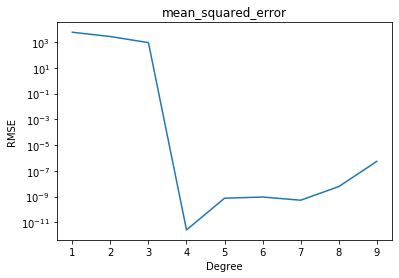

In [192]:
rmses = []
degrees = np.arange(1, 10)

for deg in degrees:

    poly = PolynomialFeatures(degree=deg, include_bias=False)
    x_train_poly = poly.fit_transform(x_train)

    poly_reg = LinearRegression()
    poly_reg.fit(x_train_poly, y_train)
    
    x_test_poly = poly.fit_transform(x_test)
    y_test_pred = poly_reg.predict(x_test_poly)
    
    #mean_squared_error
    poly_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    rmses.append(poly_rmse)
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
ax.set_title('mean_squared_error')  
plt.show()

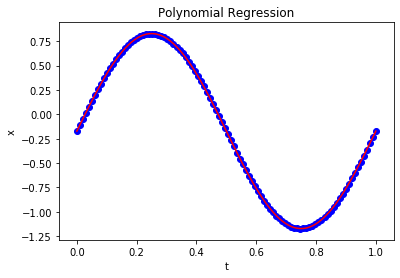

In [204]:
# 100 data
poly_100 = PolynomialFeatures(degree=9)
p_train_poly = poly_100.fit_transform(X_100.reshape(100,1))
    
line = LinearRegression()
line.fit(p_train_poly, Y_100)

p = poly_100.fit_transform(X_100.reshape(X_100.shape[0], 1))
q_100 = line.predict(p)
       
plt.scatter(X_100, Y_100, color = 'blue') 
plt.plot(X_100, q_100, color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('t') 
plt.ylabel('x') 
plt.show() 

In [244]:
#regularize
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])

def plot_model(model):
    X_plot = np.linspace(0, 1, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)
    plt.scatter(X_test, Y_test)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([0, 1, 0, 3])
    plt.show()


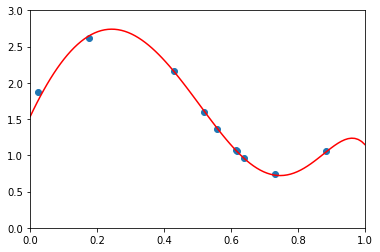

In [245]:
ridge1_reg = RidgeRegression(9, 1/100000)
ridge1_reg.fit(X_train, Y_train)

y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(Y_test, y1_predict)
plot_model(ridge1_reg)

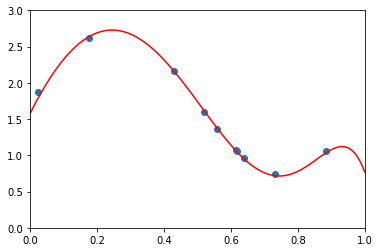

In [249]:
ridge2_reg = RidgeRegression(9, 1/10000)
ridge2_reg.fit(X_train, Y_train)
y2_predict = ridge2_reg.predict(X_test)
mean_squared_error(Y_test, y2_predict)

plot_model(ridge2_reg)


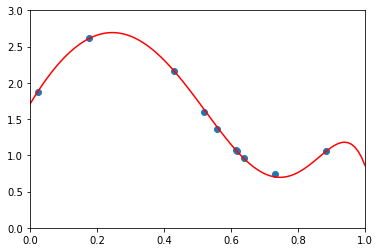

In [250]:
ridge3_reg = RidgeRegression(9, 1/1000)
ridge3_reg.fit(X_train, Y_train)
y3_predict = ridge3_reg.predict(X_test)
mean_squared_error(Y_test, y3_predict)

plot_model(ridge3_reg)

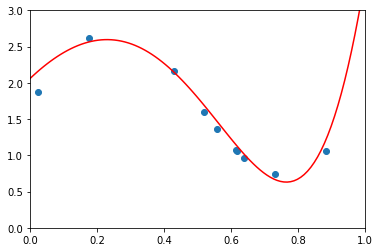

In [251]:
ridge4_reg = RidgeRegression(9, 1/100)
ridge4_reg.fit(X_train, Y_train)
y4_predict = ridge4_reg.predict(X_test)
mean_squared_error(Y_test, y4_predict)

plot_model(ridge4_reg)

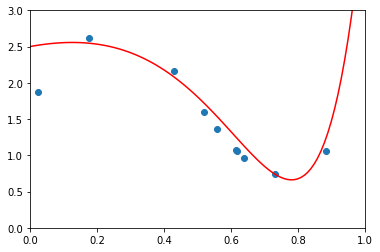

In [252]:
ridge5_reg = RidgeRegression(9, 1/10)
ridge5_reg.fit(X_train, Y_train)
y5_predict = ridge5_reg.predict(X_test)
mean_squared_error(Y_test, y5_predict)

plot_model(ridge5_reg)

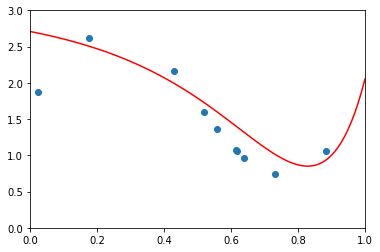

In [253]:
ridge6_reg = RidgeRegression(9, 1)
ridge6_reg.fit(X_train, Y_train)
y6_predict = ridge6_reg.predict(X_test)
mean_squared_error(Y_test, y6_predict)

plot_model(ridge6_reg)